In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 510kB/s]
100% 172k/172k [00:00<00:00, 510kB/s]


In [ ]:
!unzip telco-customer-churn.zip -d /content/telco-customer-churn

Archive:  telco-customer-churn.zip
  inflating: /content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv  


#Data Preparation

In [ ]:
!pip install dython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score
import joblib


df = pd.read_csv("telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
display(df)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
!pip show scikit-learn
!pip show joblib

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, dython, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick
Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: imbalanced-learn, librosa, mlxtend, music21, nltk, scikit-learn


## Check Tipe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check Summary statistic

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(exclude= 'number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


##Check distribution of Label Target

In [ ]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce").fillna(0)

In [ ]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("str")

In [ ]:
df["ChurnTarget"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [ ]:
num =df.select_dtypes("number").shape[1]
cat = df.select_dtypes(include="object").shape[1]

print("Jumlah kolom numeric :",num)
print("Jumlah kolom categorical :",cat)

Jumlah kolom numeric : 4
Jumlah kolom categorical : 18


## Check distribution of numerical features

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

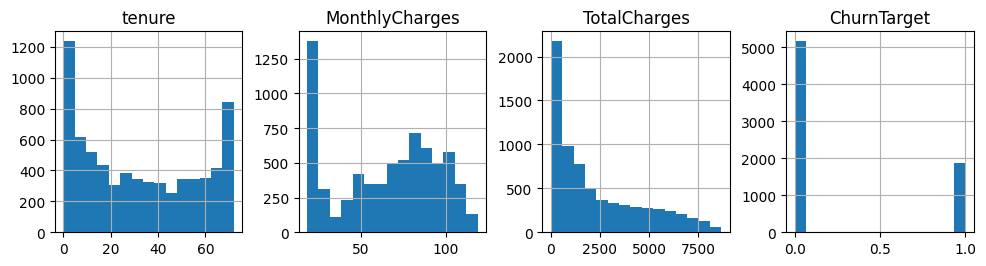

In [ ]:
num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15,6), layout=(2,5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check distribution of categorical features

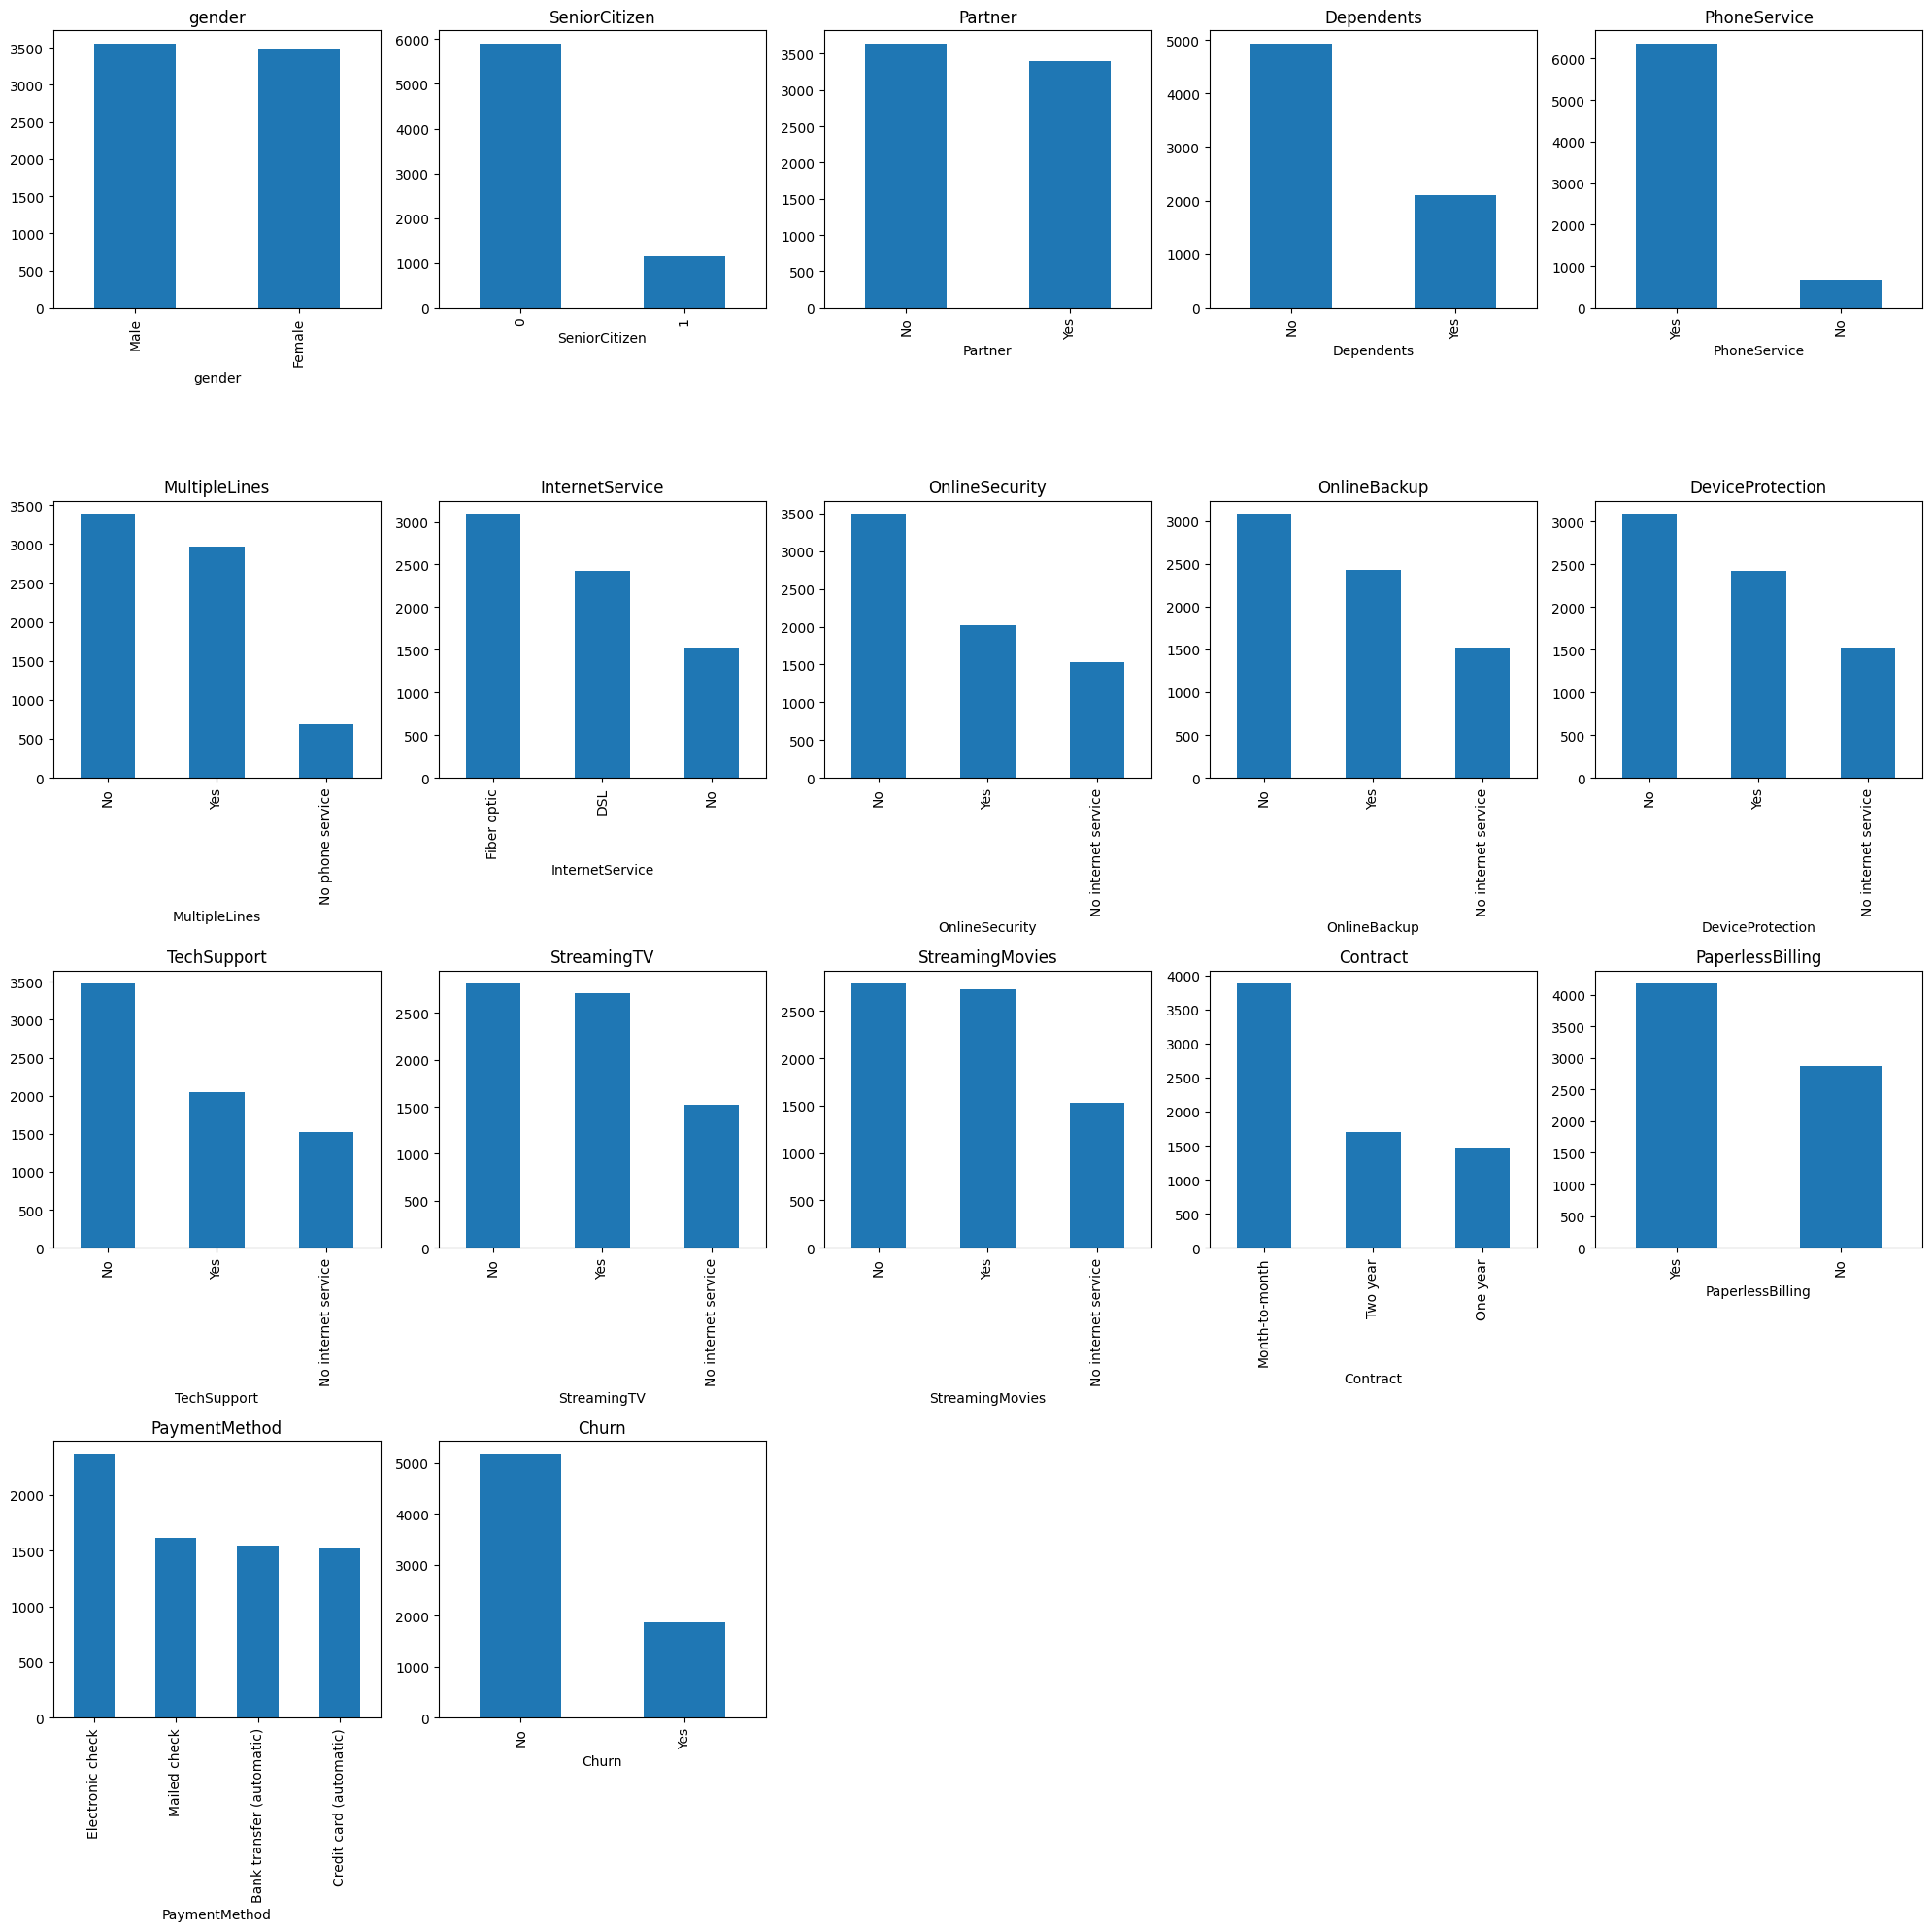

In [ ]:
cat_features = df.drop("customerID",axis=1).select_dtypes(include='object').columns
plt.figure(figsize=(20,20))
for i, col in enumerate(cat_features):
  plt.subplot(4,5,i+1)
  df[col].value_counts().plot(kind='bar')
  plt.title(col)

plt.tight_layout()
plt.show()

##Check Correlation

### Check Correlation numerical features

Text(0.5, 1.0, 'Correlation num features')

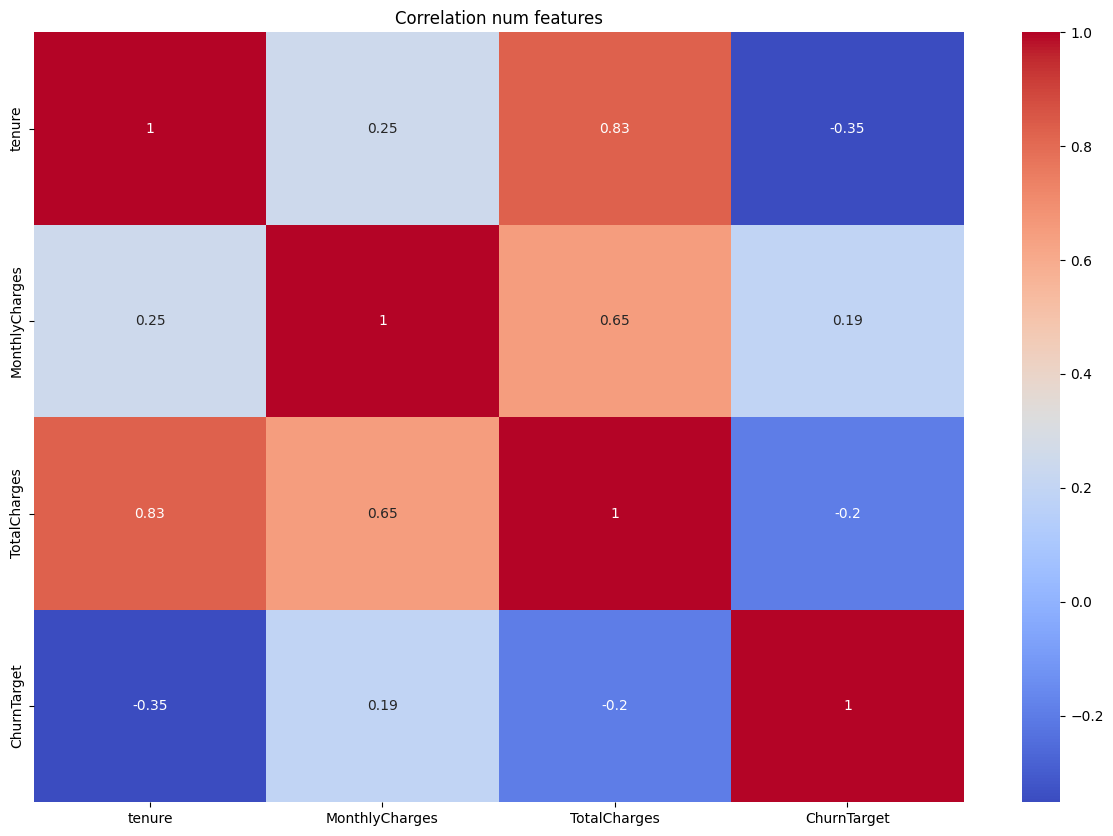

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_features].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation num features")

### Check Correlation categorical features

Text(0.5, 1.0, 'Correlation cat features')

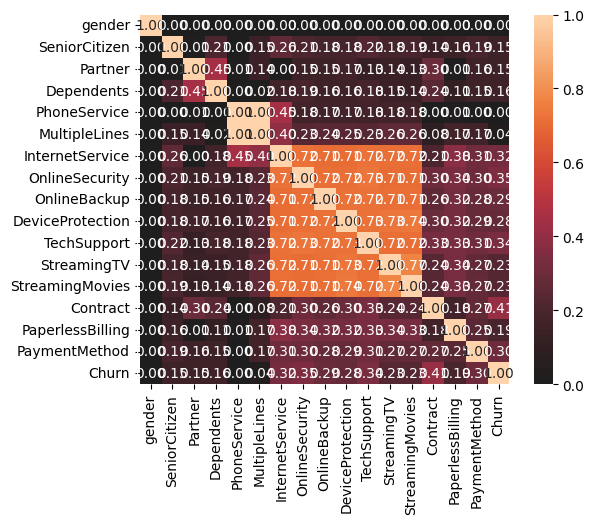

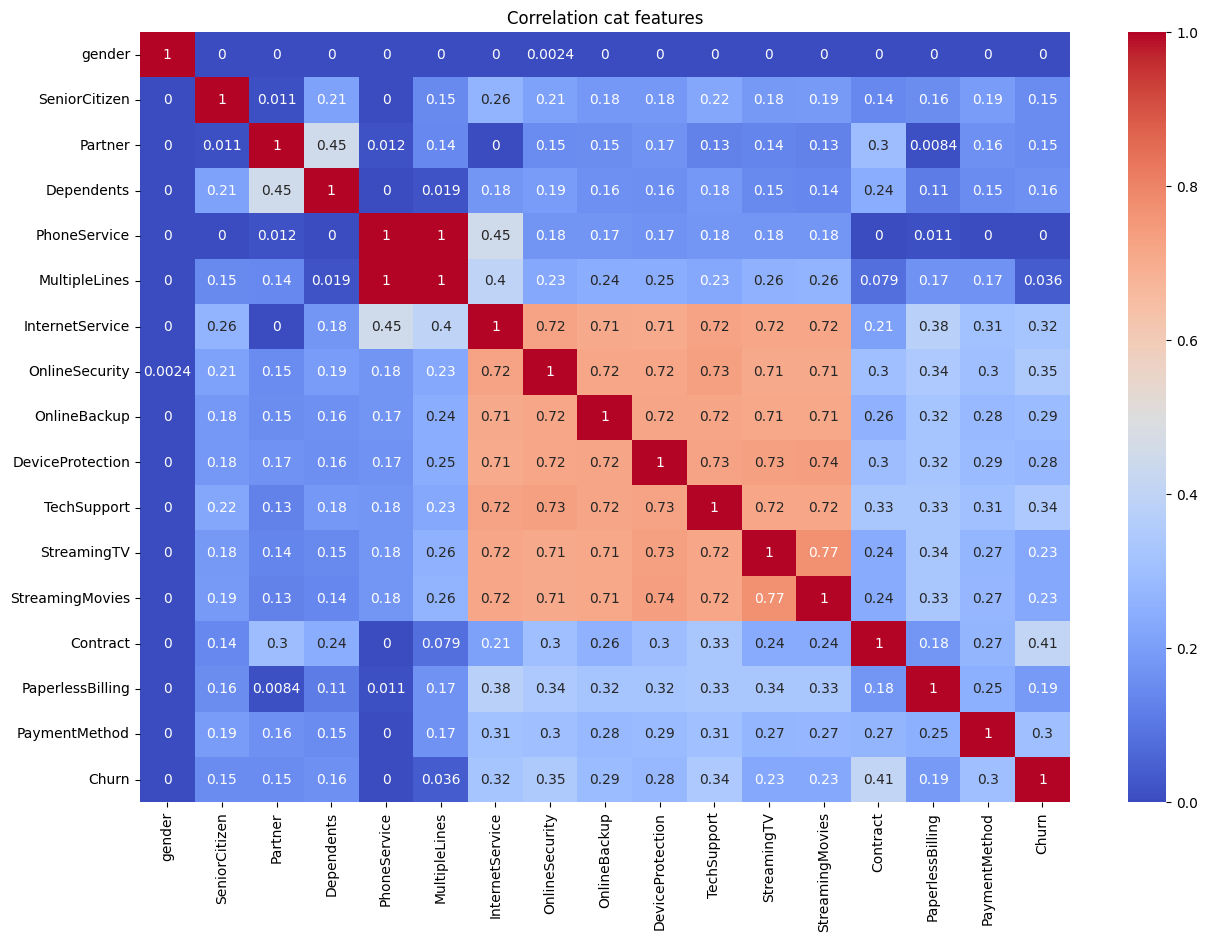

In [ ]:
from dython.nominal import associations

associate = associations(df[cat_features], nominal_columns = "all", plot=False)
corr_matrix = associate["corr"]

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title("Correlation cat features")


## Check Outlier

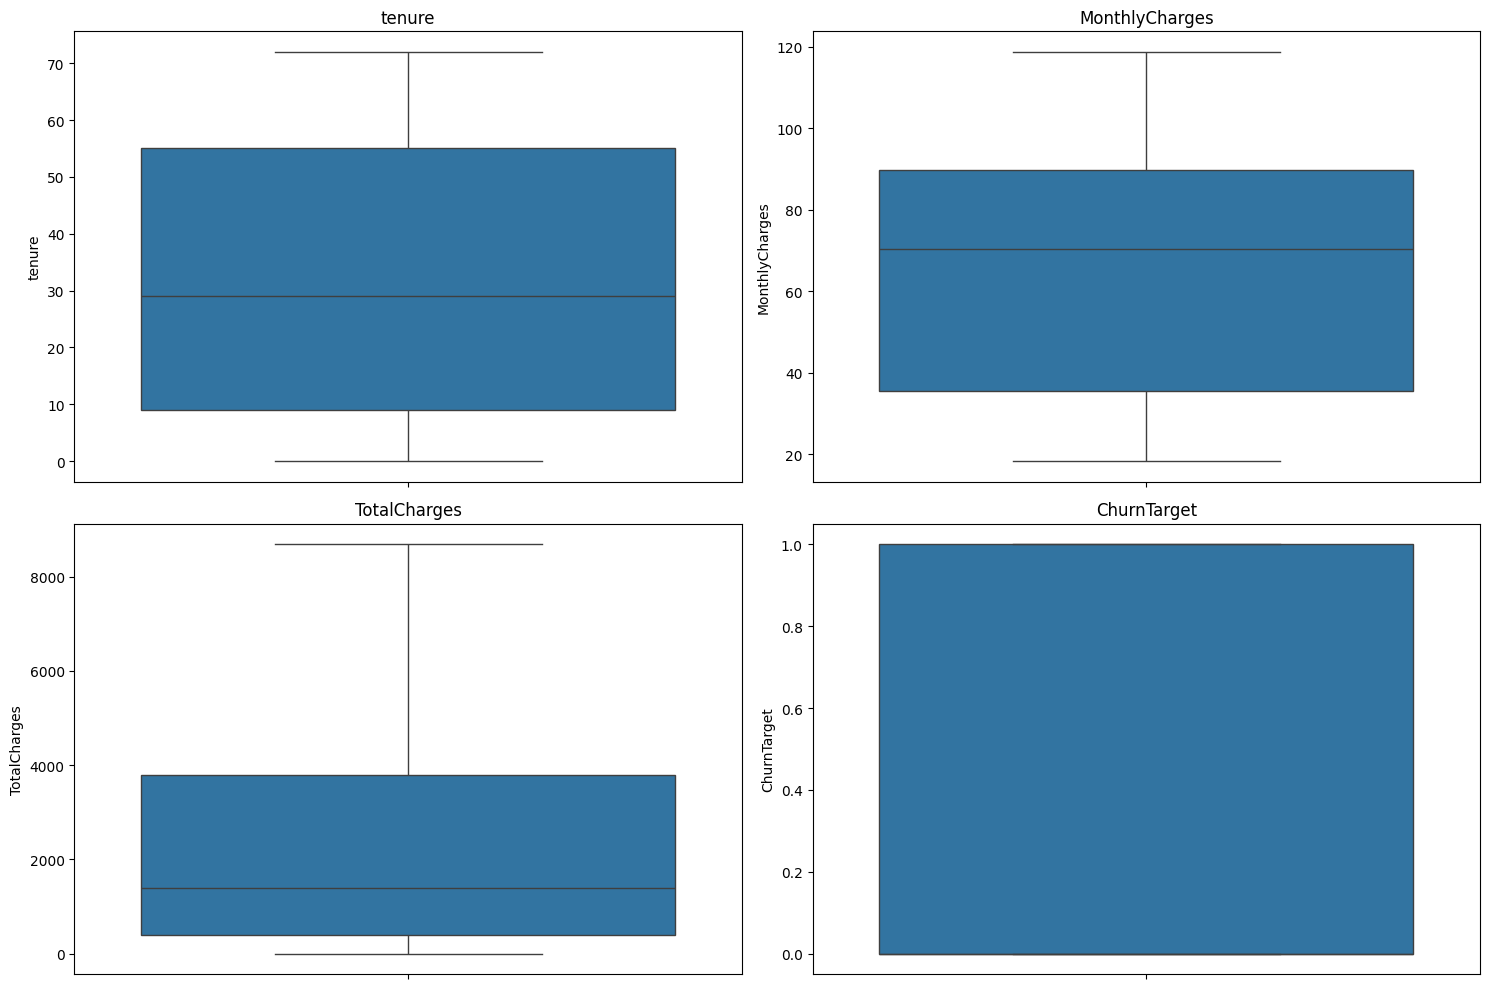

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(col)

plt.tight_layout()

## Feature Selection

In [ ]:
target = "ChurnTarget"
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

correlations = df[num_features].corrwith(df[target])

threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

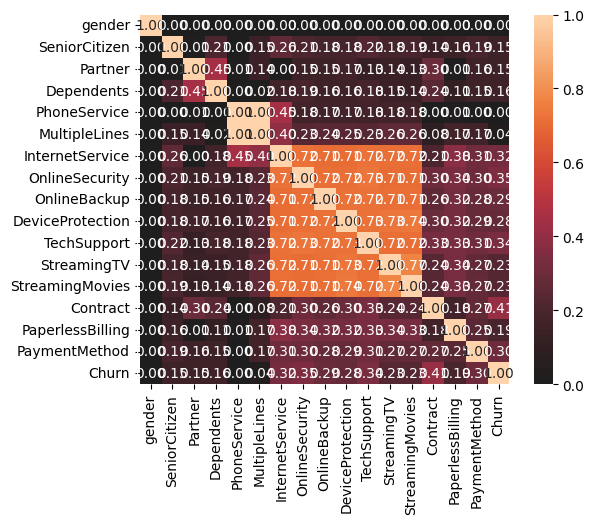

In [ ]:
categorical_target = "Churn"
associate  = associations(df[cat_features],nominal_columns = "all", plot=False)
corr_matrix = associate["corr"]

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold].index.tolist()

del selected_cat_features[-1]

In [ ]:
all_selected = []

all_selected.extend(selected_num_features)
all_selected.extend(selected_cat_features)

print(all_selected)

['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


# Modelling

In [ ]:
target = "ChurnTarget"

X = df[all_selected]
y = df[target]

cat_features = X.select_dtypes(include="object").columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

##Preprocessing Steps

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

In [ ]:
cat_features[0]

['InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

##Train-Test split

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=42, stratify=y_train_val)

## Initiate Pipeline

In [ ]:
pipeline = Pipeline(steps=[
    ("preprocesor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Temporary Evaluation Model

In [ ]:
#Evaluate on validation set
y_val_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_val_pred))

#Evaluate on Test set
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       828
           1       0.67      0.54      0.60       299

    accuracy                           0.81      1127
   macro avg       0.76      0.72      0.74      1127
weighted avg       0.80      0.81      0.80      1127

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



##Coefficient Analysis


Coefficients of the Logistic Regression Model:
                                    Feature  Coefficient
10                  Contract_Month-to-month     0.767660
2               InternetService_Fiber optic     0.651803
4                         OnlineSecurity_No     0.381536
7                            TechSupport_No     0.319480
15           PaymentMethod_Electronic check     0.300185
11                        Contract_One year     0.020843
0                                    tenure    -0.025654
9                           TechSupport_Yes    -0.030064
16               PaymentMethod_Mailed check    -0.053808
6                        OnlineSecurity_Yes    -0.092121
13  PaymentMethod_Bank transfer (automatic)    -0.102580
14    PaymentMethod_Credit card (automatic)    -0.137827
5        OnlineSecurity_No internet service    -0.283445
3                        InternetService_No    -0.283445
8           TechSupport_No internet service    -0.283445
1                       InternetService_

<Figure size 1000x800 with 0 Axes>

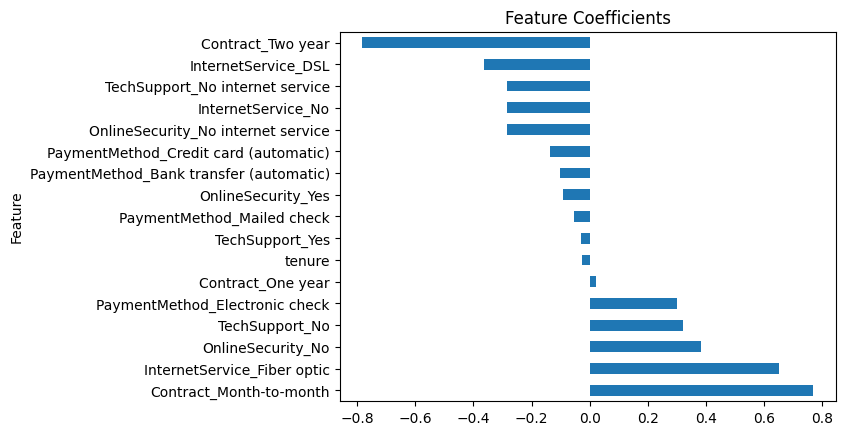

In [ ]:
# Explainability - Coefficients Analysis
model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocesor']
onehot_columns = preprocessor.transformers_[1][1].get_feature_names_out(cat_features)
feature_names = num_features + list(onehot_columns)
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("\nCoefficients of the Logistic Regression Model:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 8))
coef_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Feature Coefficients')
plt.show()

## Optimize Model

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'classifier__C': [0,1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_val_pred = grid_search.predict(X_val)
print(classification_report(y_val, y_val_pred))

y_test_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_test_pred))

Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       828
           1       0.67      0.54      0.60       299

    accuracy                           0.81      1127
   macro avg       0.76      0.72      0.74      1127
weighted avg       0.80      0.81      0.80      1127

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

# Deployment Model

In [ ]:
best_params = {"classifier__C": 1, "classifier__solver": 'lbfgs'}
reg_model = LogisticRegression(C=best_params["classifier__C"], solver = best_params["classifier__solver"],max_iter=1000)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', reg_model)
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']